In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [7]:
isnull_sum = train.isnull().sum()
isnull_sum[isnull_sum > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [8]:
print(type(isnull_sum[isnull_sum > 0]))
isnull_sum[isnull_sum > 0].shape

<class 'pandas.core.series.Series'>


(19,)

In [9]:
train_null = isnull_sum[isnull_sum > 0]

In [10]:
isnull_sum = test.isnull().sum()
isnull_sum[isnull_sum > 0].sort_values(ascending=False)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

In [11]:
isnull_sum[isnull_sum > 0].shape

(33,)

In [12]:
test_null = isnull_sum[isnull_sum > 0]

In [13]:
null_columns = pd.DataFrame({'train' : train_null, 'test' : test_null})
null_columns

,train,test
Alley,1369.0,1352.0
BsmtCond,37.0,45.0
BsmtExposure,38.0,44.0
BsmtFinSF1,NaN,1.0
BsmtFinSF2,NaN,1.0
BsmtFinType1,37.0,42.0
BsmtFinType2,38.0,42.0
BsmtFullBath,NaN,2.0
BsmtHalfBath,NaN,2.0
BsmtQual,37.0,44.0


- ['Alley', 'Fence', 'FireplaceQu', 'MiscFeature', 'PoolQC'] 의<br>
 NA 값은 의미를 가진 값이므로, drop이 아닌 다른 값으로 대체 필요
- 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageFinish', 'GarageCond' 의 <br>
NA 값은 의미를 가진 값, 다른 값으로 대체 필요

In [14]:
train[['Alley', 'Fence', 'FireplaceQu', 'MiscFeature', 'PoolQC']].head(30)

,Alley,Fence,FireplaceQu,MiscFeature,PoolQC
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,TA,NaN,NaN
2,NaN,NaN,TA,NaN,NaN
3,NaN,NaN,Gd,NaN,NaN
4,NaN,NaN,TA,NaN,NaN
5,NaN,MnPrv,NaN,Shed,NaN
6,NaN,NaN,Gd,NaN,NaN
7,NaN,NaN,TA,Shed,NaN
8,NaN,NaN,TA,NaN,NaN
9,NaN,NaN,TA,NaN,NaN


In [15]:
train[null_columns.index].dtypes.value_counts()

object     23
int64       8
float64     3
dtype: int64

In [16]:
for column in train_null.index :
    print(column, ':', train[column].dtypes, '-', train[column].isnull().sum() , 'EA')

LotFrontage : float64 - 259 EA
Alley : object - 1369 EA
MasVnrType : object - 8 EA
MasVnrArea : float64 - 8 EA
BsmtQual : object - 37 EA
BsmtCond : object - 37 EA
BsmtExposure : object - 38 EA
BsmtFinType1 : object - 37 EA
BsmtFinType2 : object - 38 EA
Electrical : object - 1 EA
FireplaceQu : object - 690 EA
GarageType : object - 81 EA
GarageYrBlt : float64 - 81 EA
GarageFinish : object - 81 EA
GarageQual : object - 81 EA
GarageCond : object - 81 EA
PoolQC : object - 1453 EA
Fence : object - 1179 EA
MiscFeature : object - 1406 EA


In [17]:
for column in test_null.index :
    print(column, ':', test[column].dtypes, '-', test[column].isnull().sum() , 'EA')

MSZoning : object - 4 EA
LotFrontage : float64 - 227 EA
Alley : object - 1352 EA
Utilities : object - 2 EA
Exterior1st : object - 1 EA
Exterior2nd : object - 1 EA
MasVnrType : object - 16 EA
MasVnrArea : float64 - 15 EA
BsmtQual : object - 44 EA
BsmtCond : object - 45 EA
BsmtExposure : object - 44 EA
BsmtFinType1 : object - 42 EA
BsmtFinSF1 : float64 - 1 EA
BsmtFinType2 : object - 42 EA
BsmtFinSF2 : float64 - 1 EA
BsmtUnfSF : float64 - 1 EA
TotalBsmtSF : float64 - 1 EA
BsmtFullBath : float64 - 2 EA
BsmtHalfBath : float64 - 2 EA
KitchenQual : object - 1 EA
Functional : object - 2 EA
FireplaceQu : object - 730 EA
GarageType : object - 76 EA
GarageYrBlt : float64 - 78 EA
GarageFinish : object - 78 EA
GarageCars : float64 - 1 EA
GarageArea : float64 - 1 EA
GarageQual : object - 78 EA
GarageCond : object - 78 EA
PoolQC : object - 1456 EA
Fence : object - 1169 EA
MiscFeature : object - 1408 EA
SaleType : object - 1 EA


- null 처리 <br>
constant 0 : ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF, 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 
'GarageCars', 'GarageArea'] <br>
mean : ['LotFrontage',] <br>
rf : ['GarageYrBlt',]

In [18]:
data = train.copy()

In [19]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 수치형 data EDA

In [20]:
columns = data.columns

num_columns = []

for column in columns :
    if data[column].dtypes != 'object' :
        num_columns.append(column)
        
num_columns[:10]

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1']

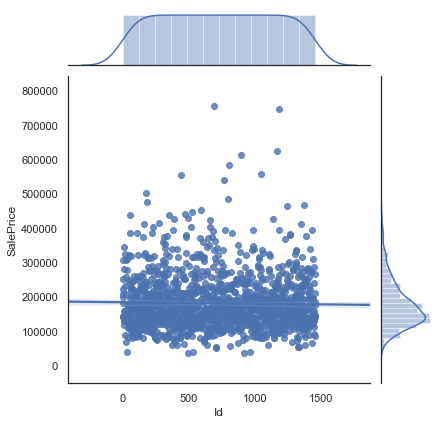

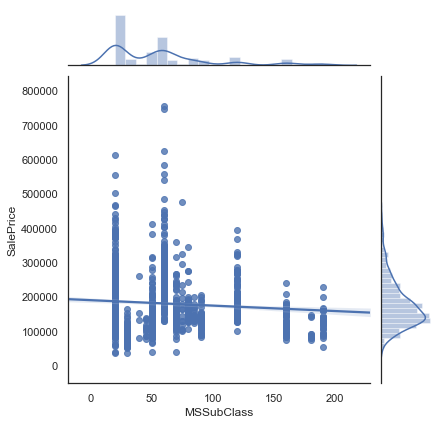

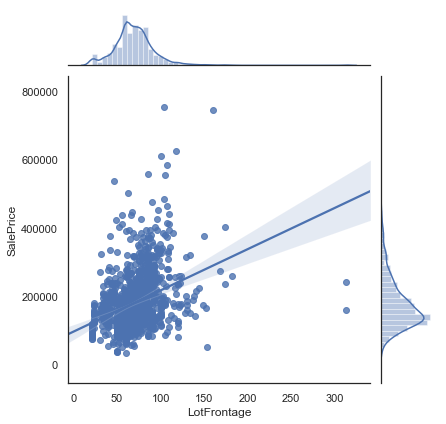

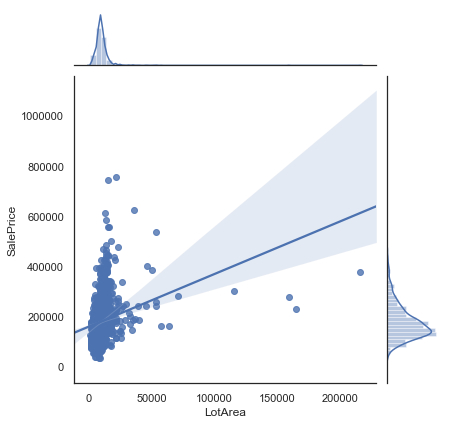

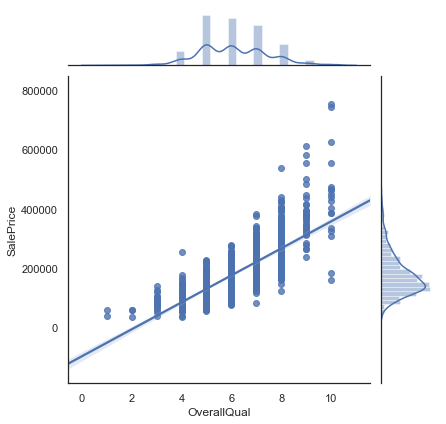

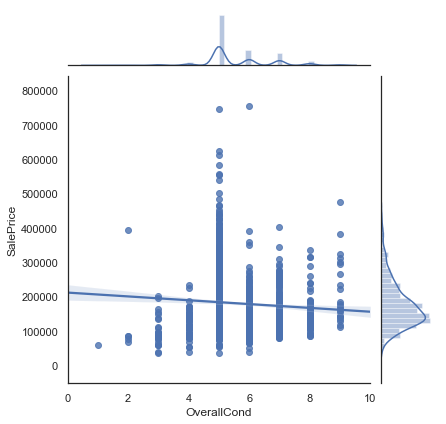

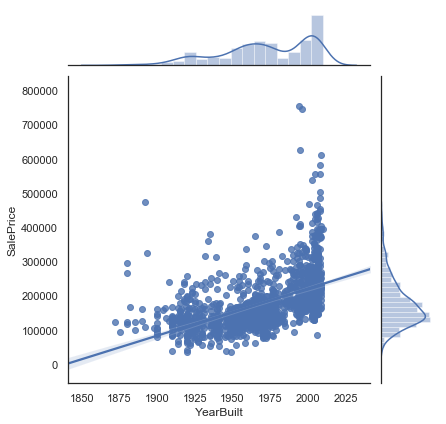

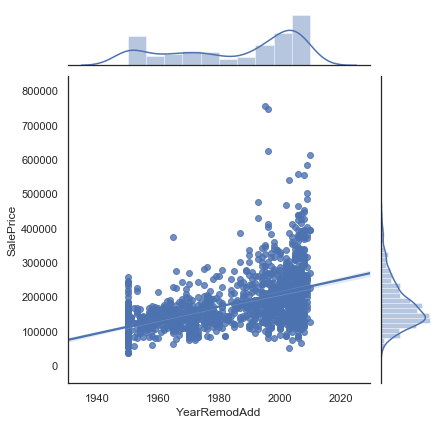

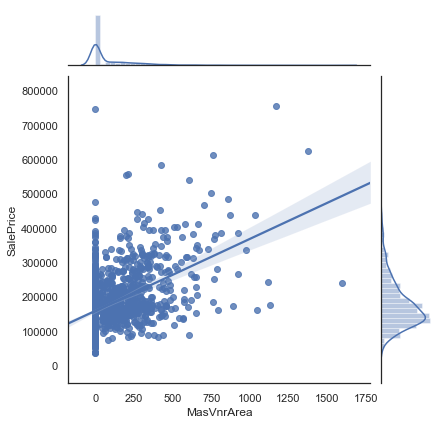

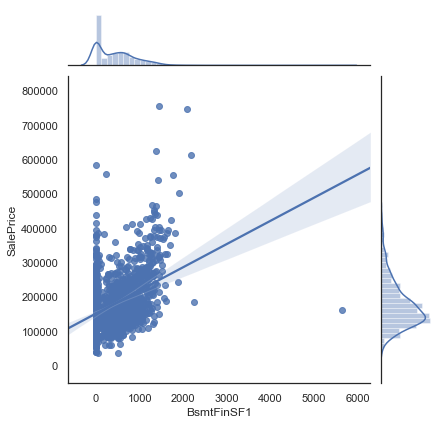

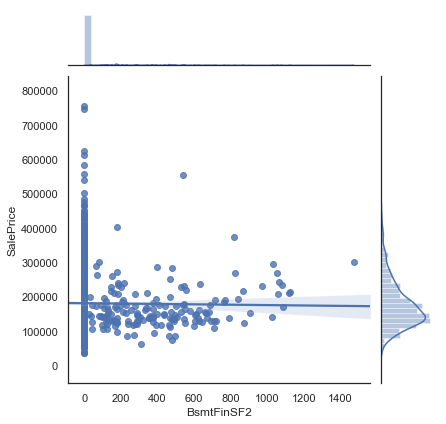

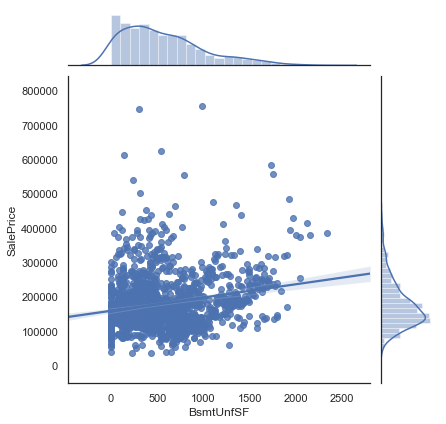

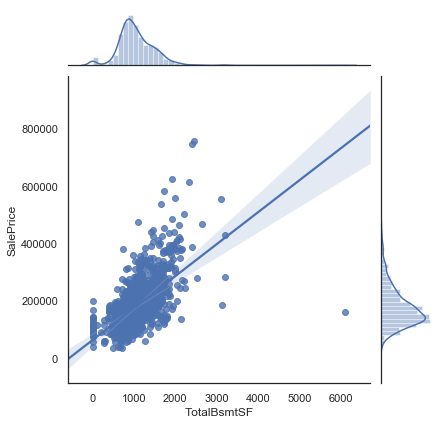

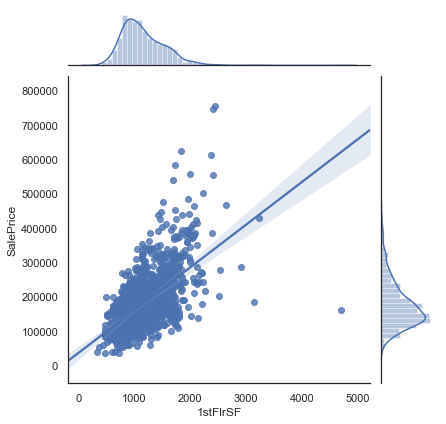

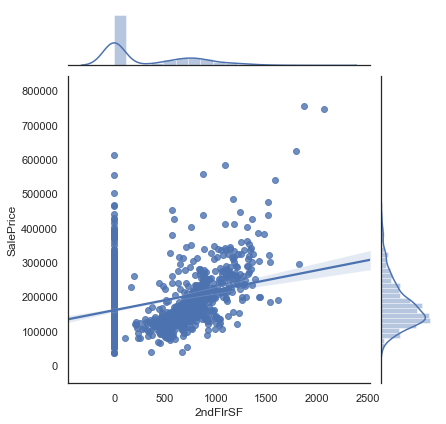

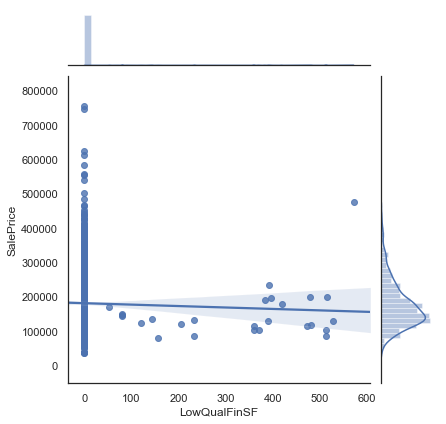

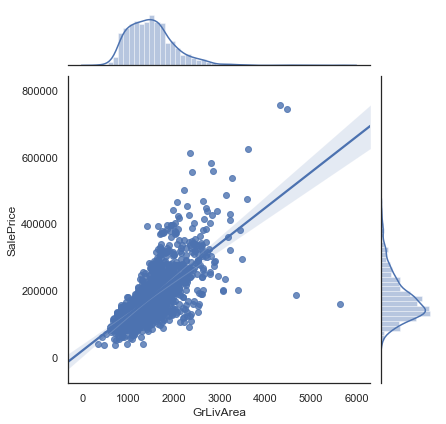

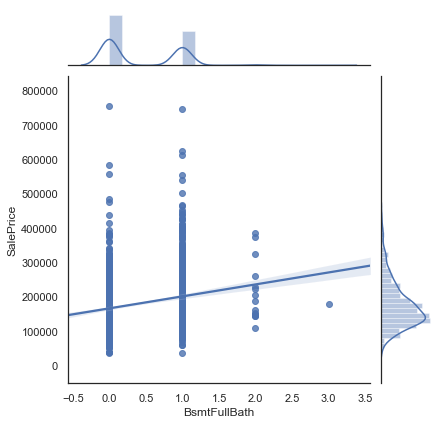

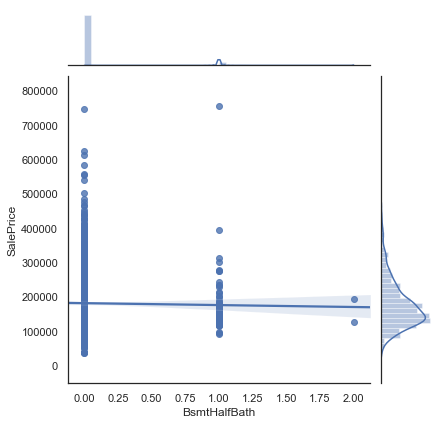

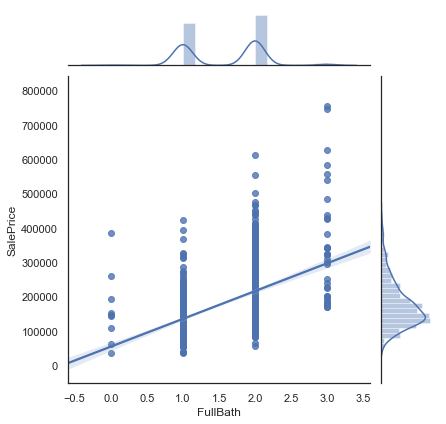

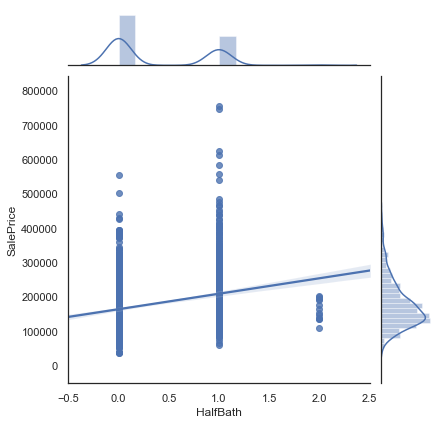

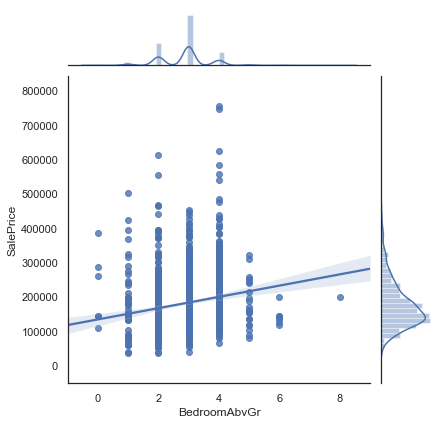

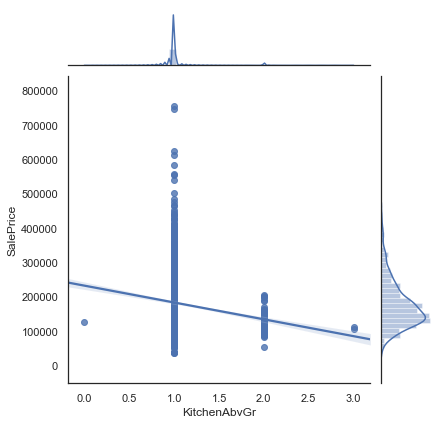

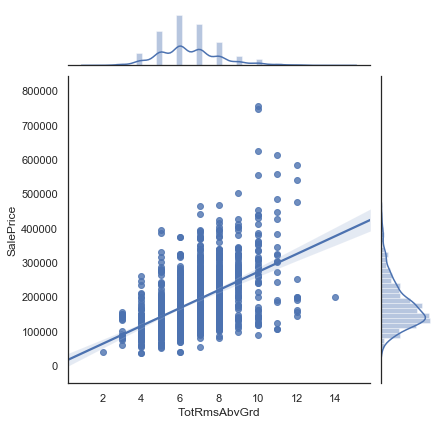

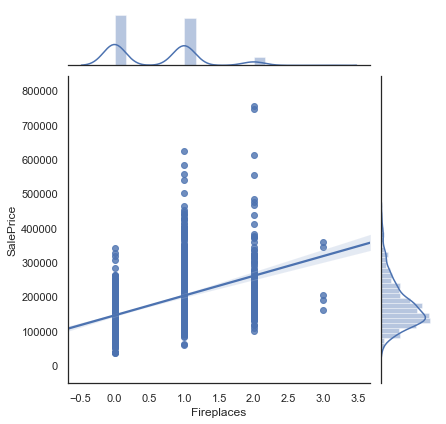

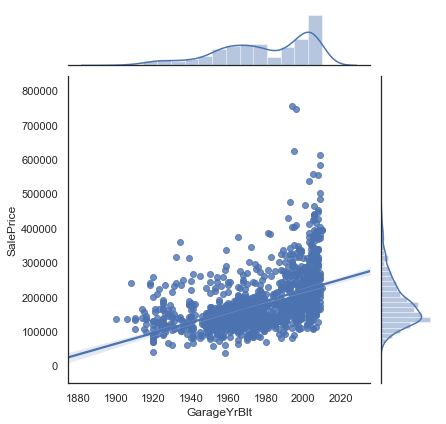

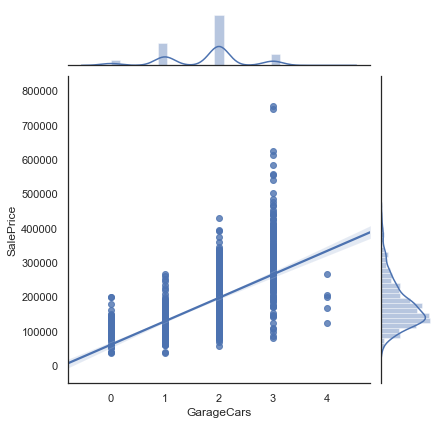

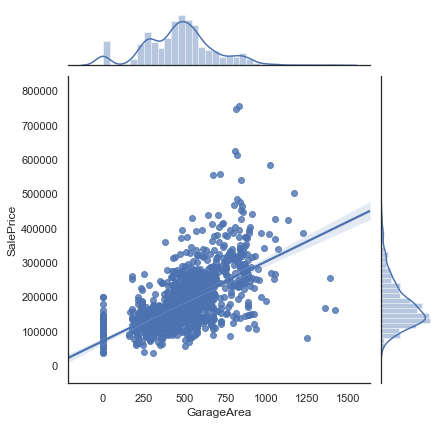

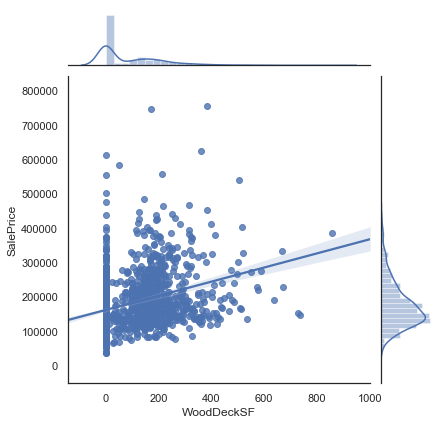

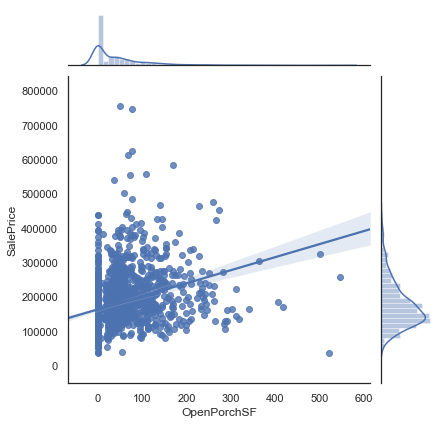

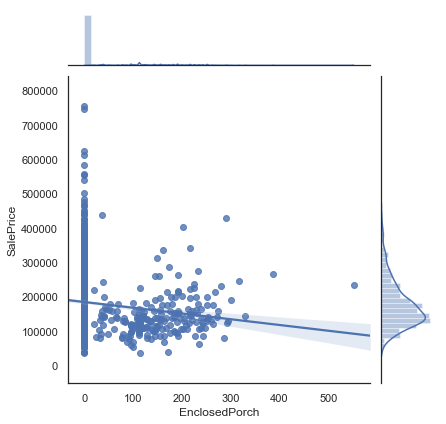

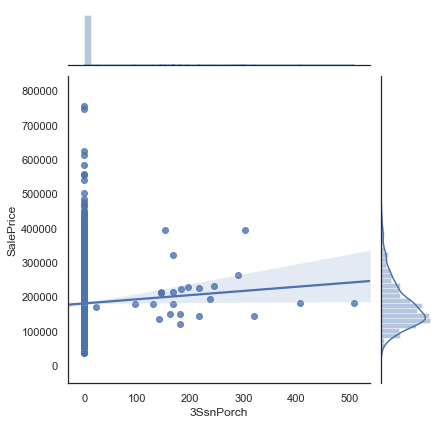

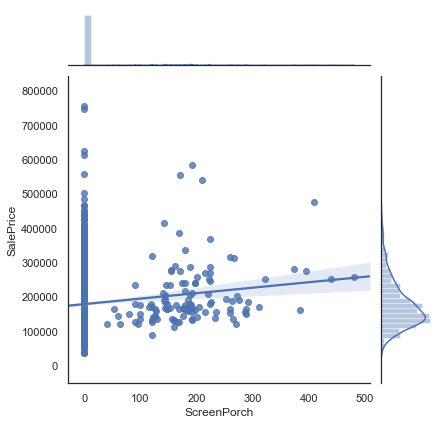

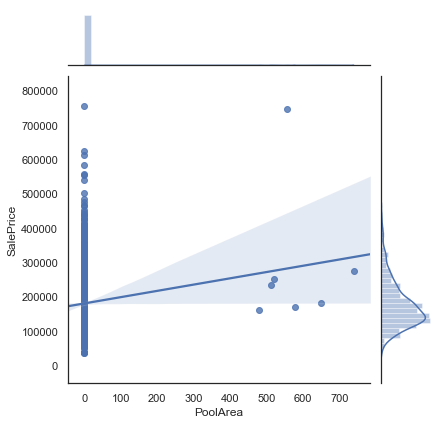

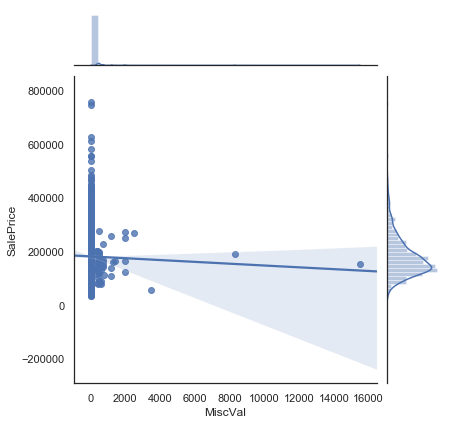

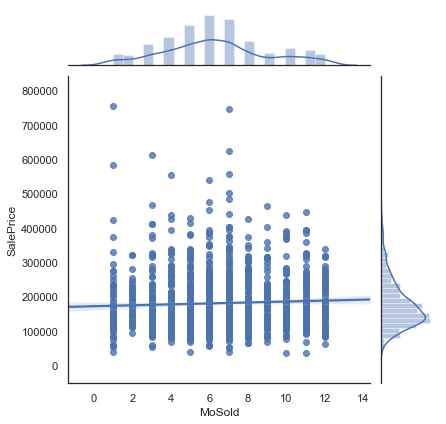

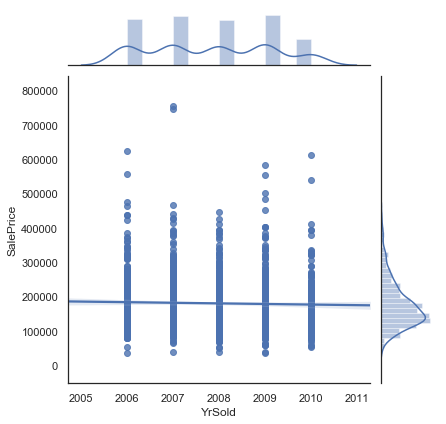

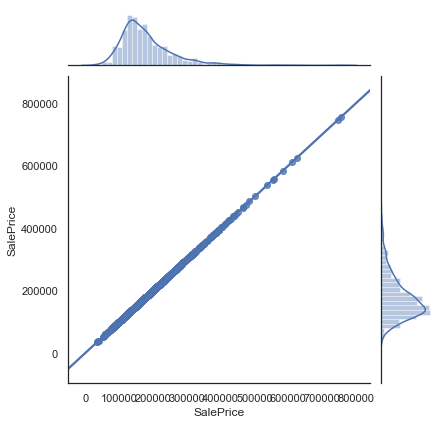

In [21]:
k = len(num_columns)

for i in range(k) :
    with sns.axes_style('white') :
        sns.jointplot(data=data, x=num_columns[i], y='SalePrice', kind='reg')

In [22]:
num_columns

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

useful : 
['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
'GrLivArea', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
'WoodDeckSF', 'OpenPorchSF', 'Fireplaces']

useless :
['Id', 'MoSold', 'YrSold']
['MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'EnclosedPorch', '3SsnPorch',
'ScreenPorch', 'PoolArea',]

check :
['LotArea',]

check 0
['MasVnrArea', 'BsmtFinSF1', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF',]

check bar
['BsmtFullBath', 'HalfBath', 'Fireplaces']

need ohe :
['MSSubClass']

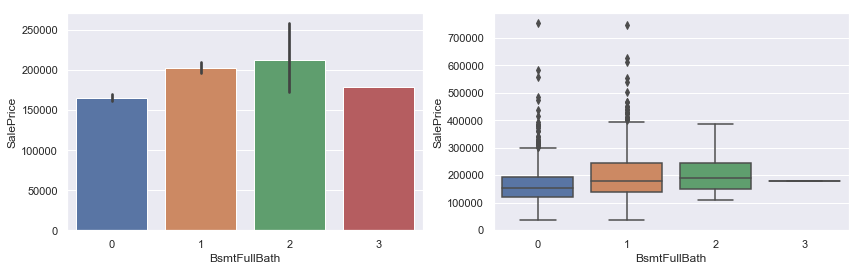

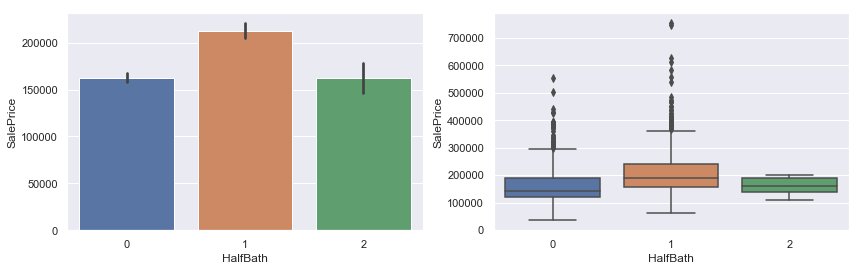

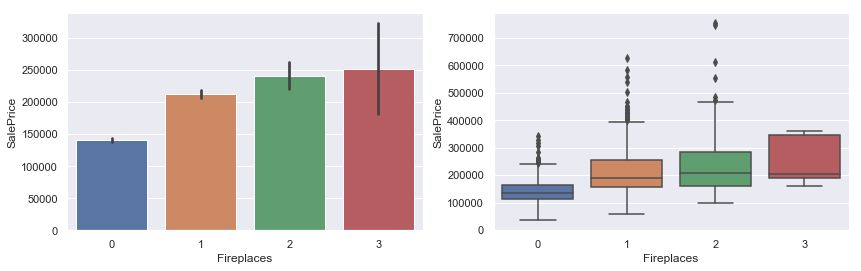

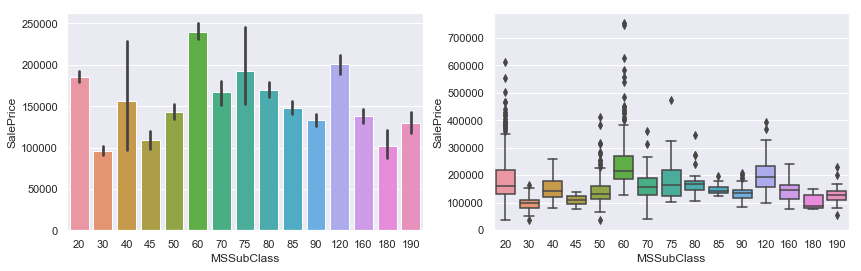

In [23]:
check_columns = ['BsmtFullBath', 'HalfBath', 'Fireplaces', 'MSSubClass']
k = len(check_columns)

for i in range(k) :
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
    sns.barplot(data=data, x=check_columns[i], y='SalePrice', ax=ax1)
    sns.boxplot(data=data, x=check_columns[i], y='SalePrice', ax=ax2)

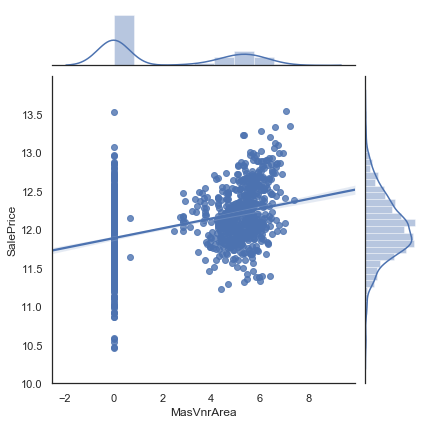

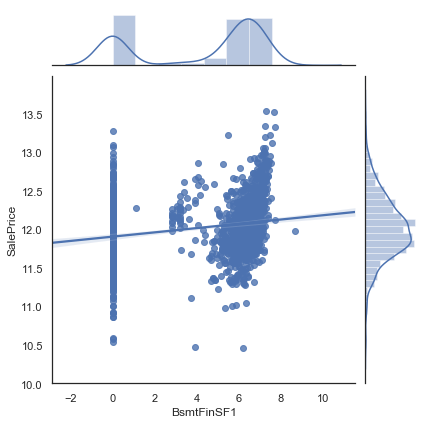

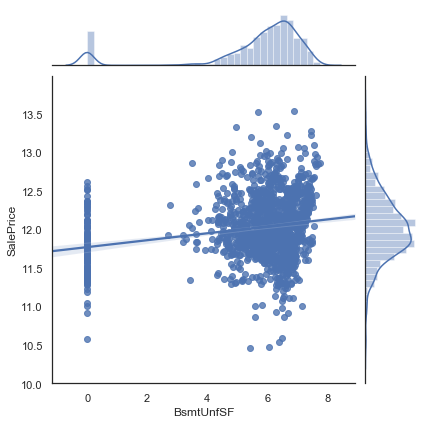

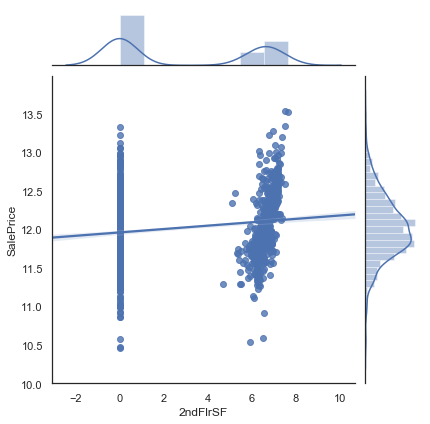

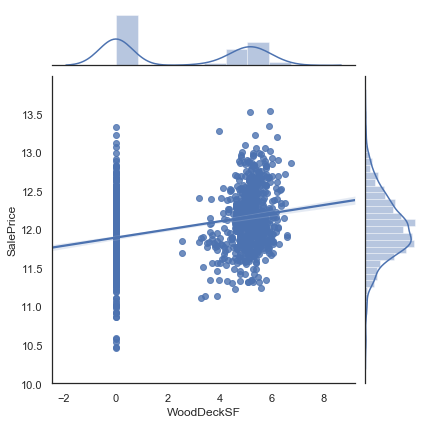

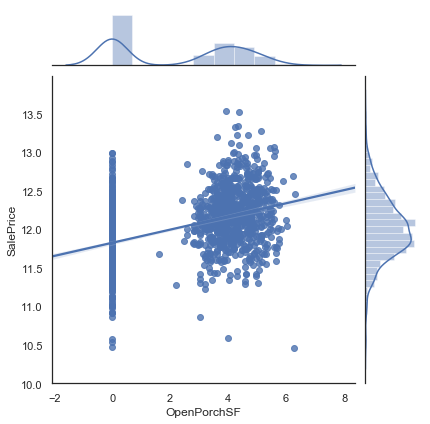

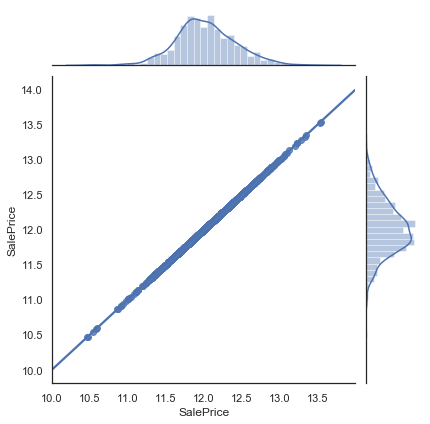

In [24]:
log_num_columns = ['MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']
data_log = np.log1p(data[log_num_columns])

k = len(log_num_columns)

for i in range(k) :
    with sns.axes_style('white') :
        sns.jointplot(data=data_log, x=log_num_columns[i], y='SalePrice', kind='reg')

### 범주형 data EDA

In [25]:
columns = data.columns

cat_columns = []

for column in columns :
    if data[column].dtypes == 'object' :
        cat_columns.append(column)
        
cat_columns[:10]

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1']

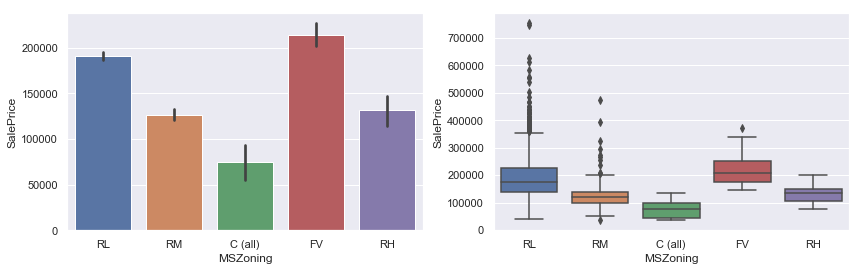

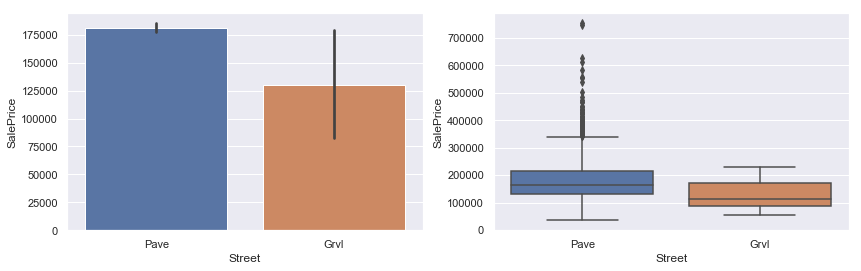

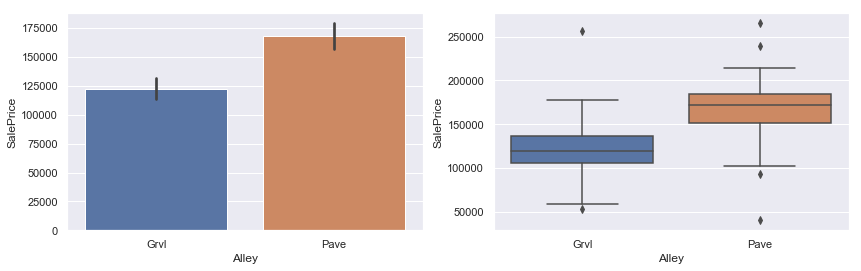

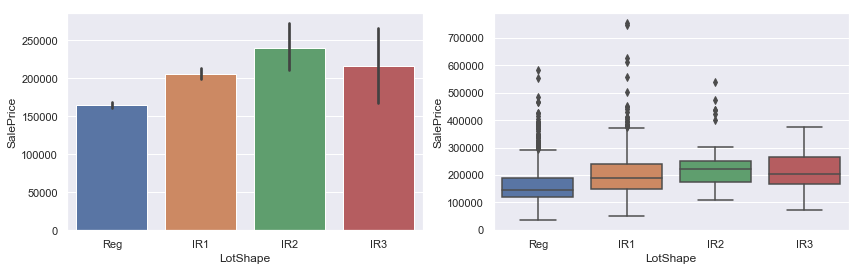

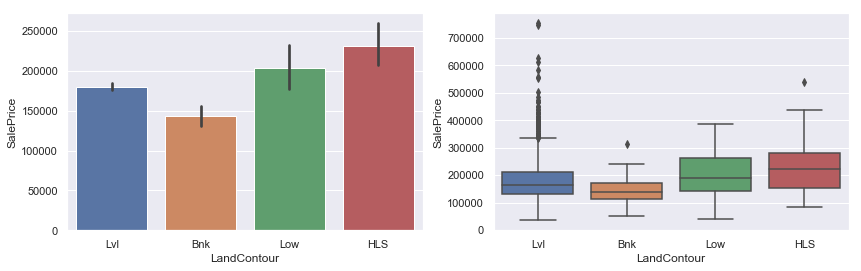

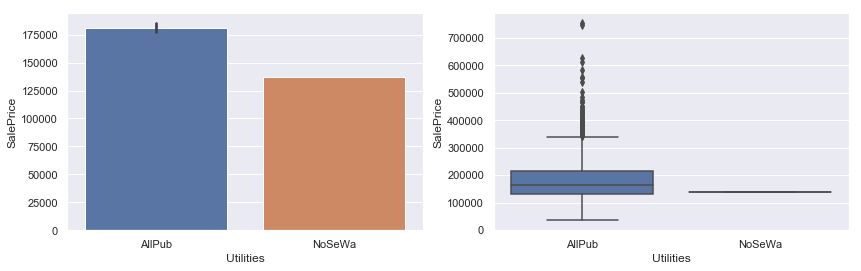

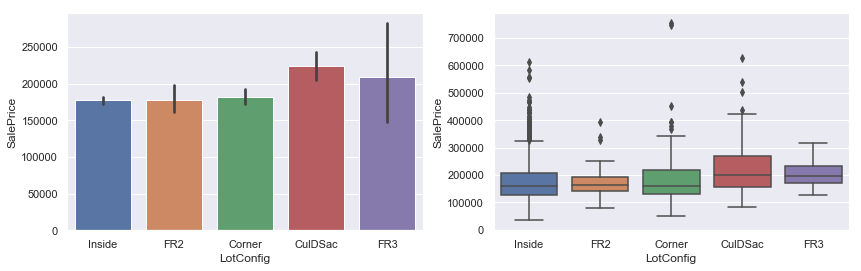

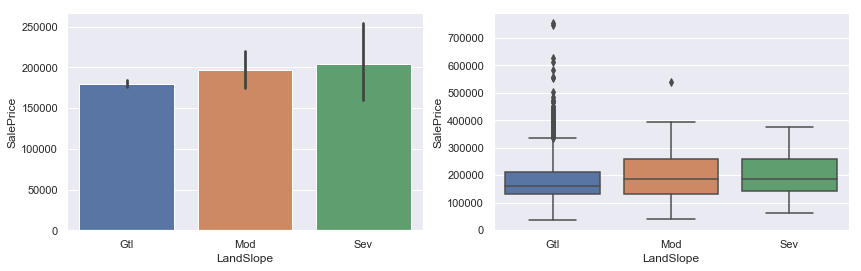

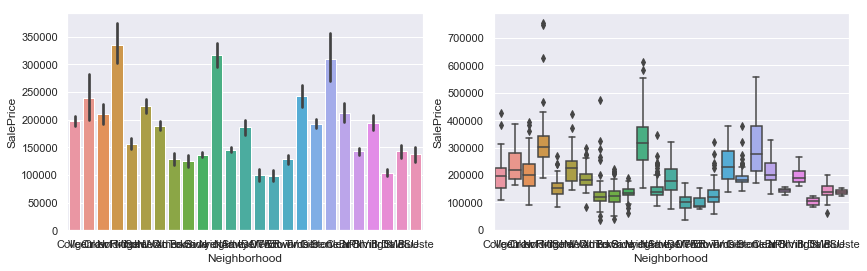

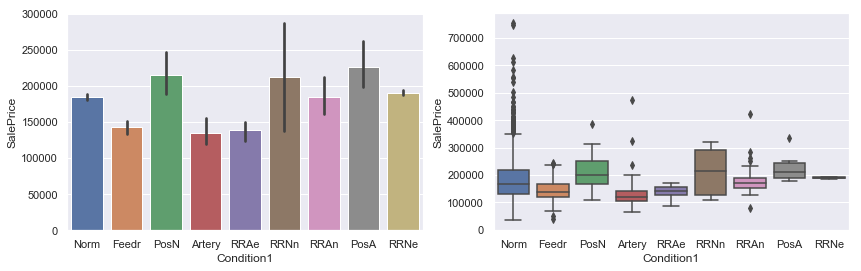

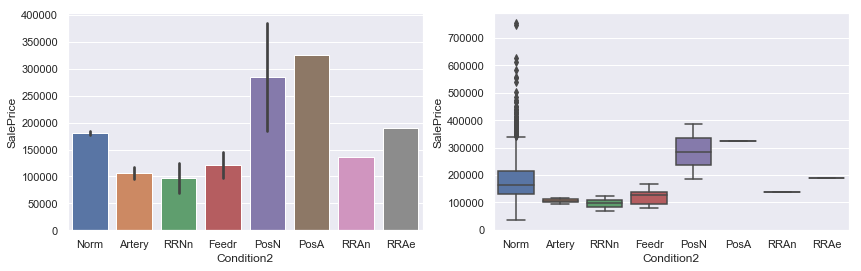

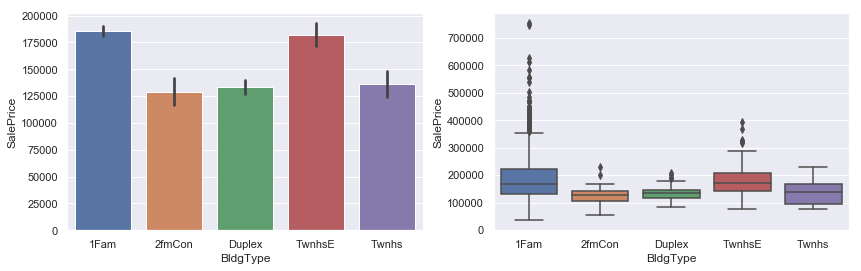

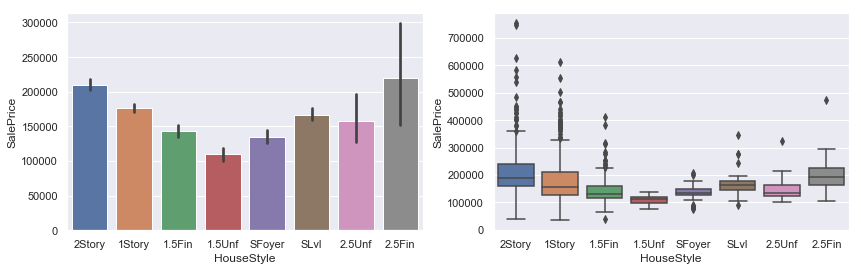

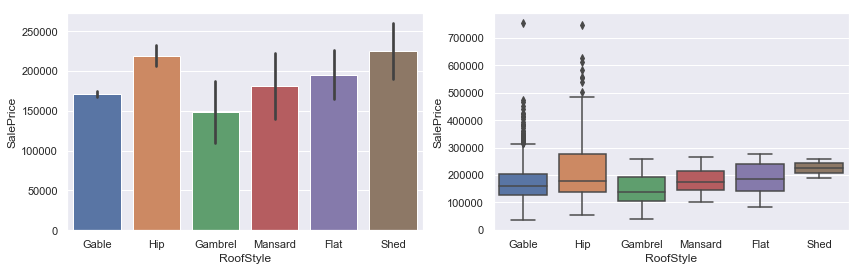

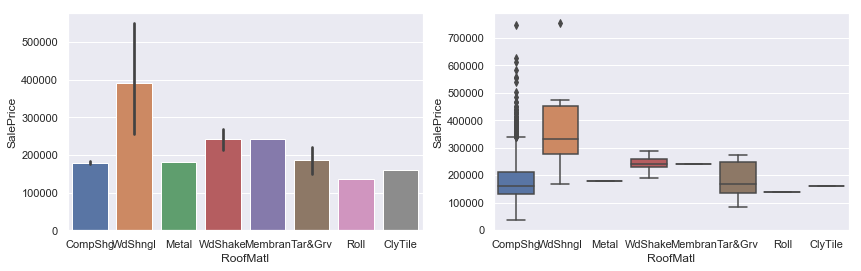

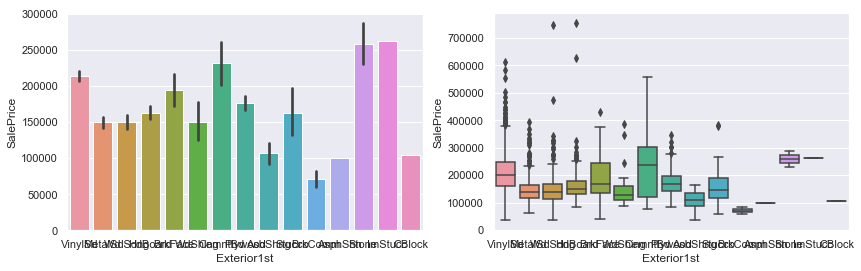

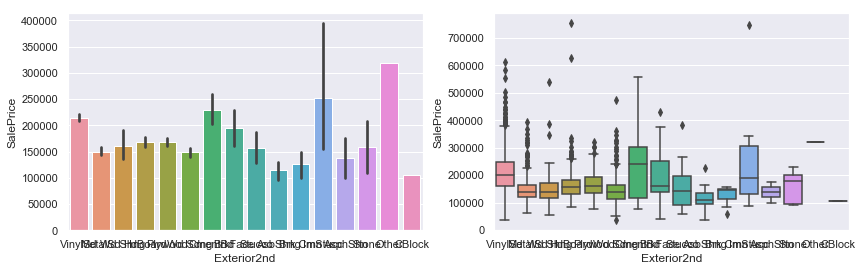

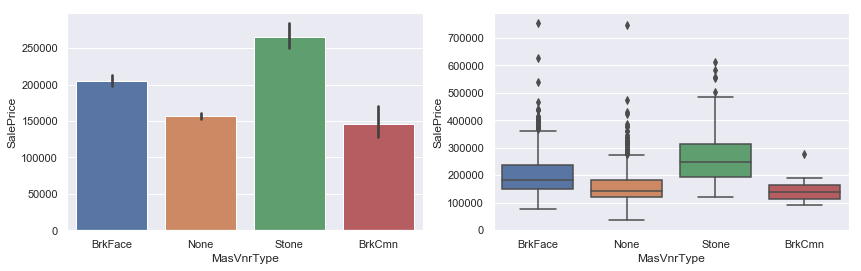

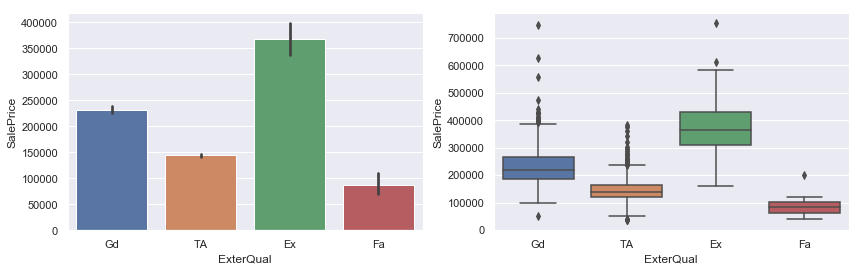

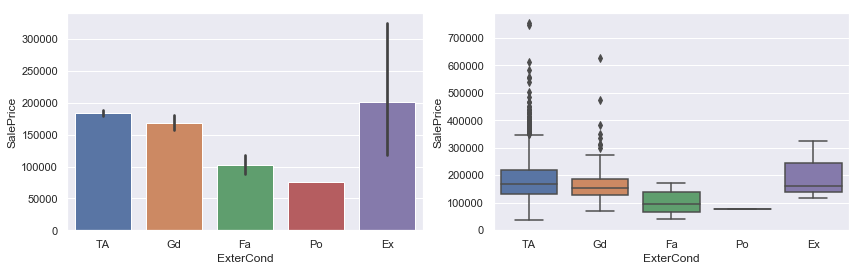

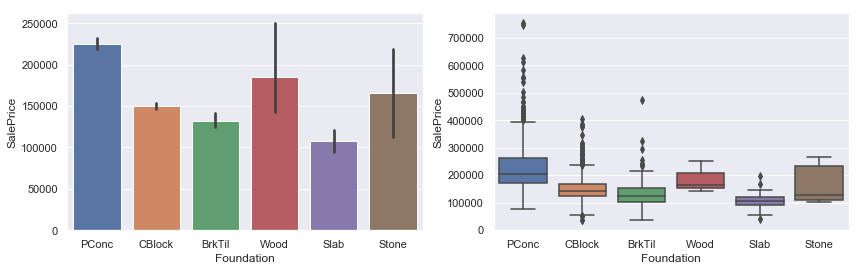

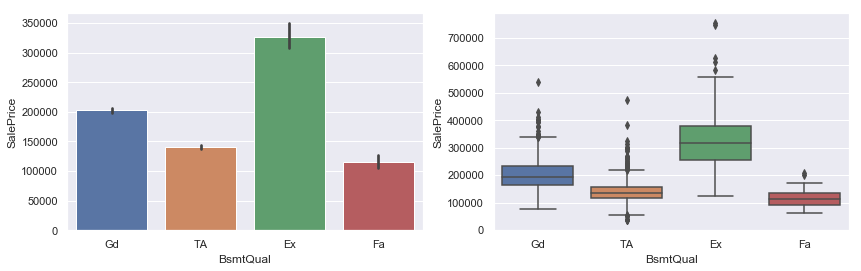

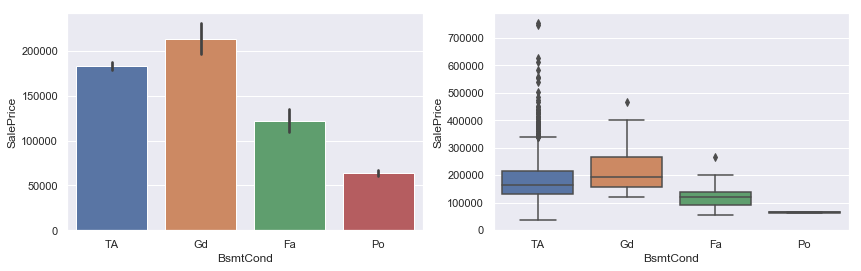

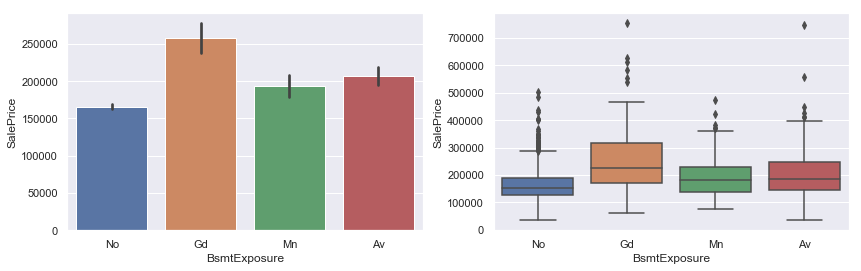

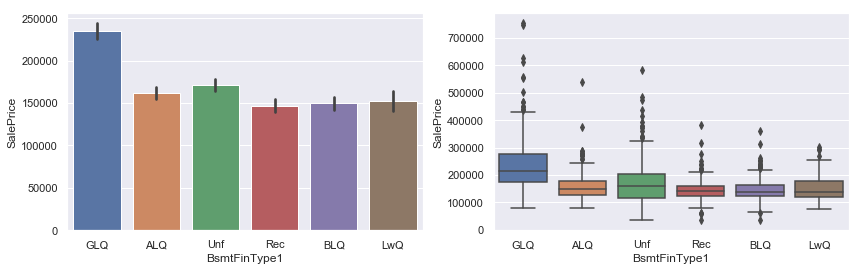

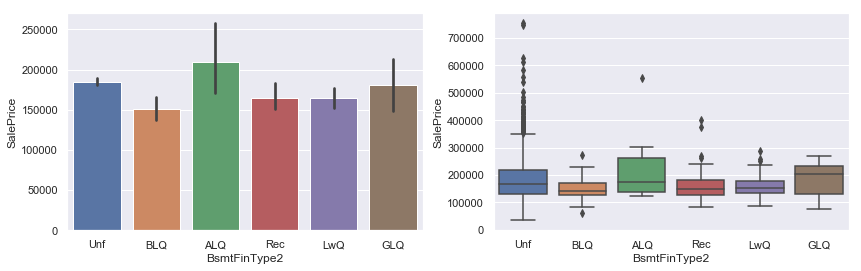

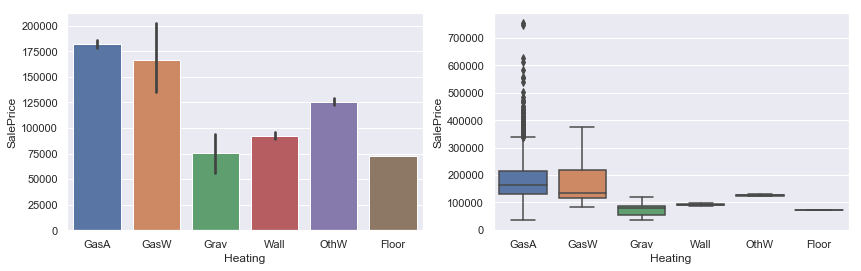

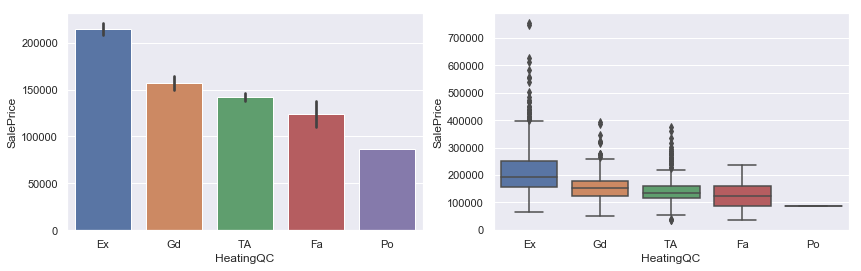

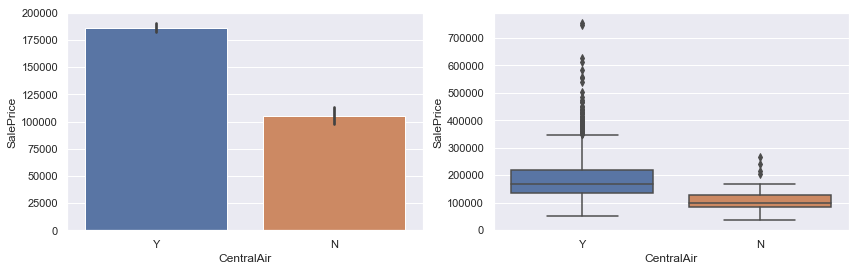

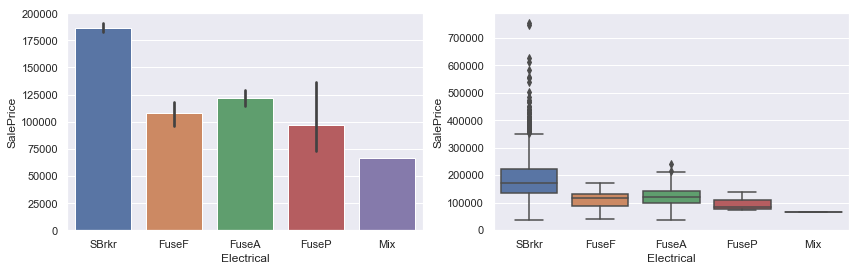

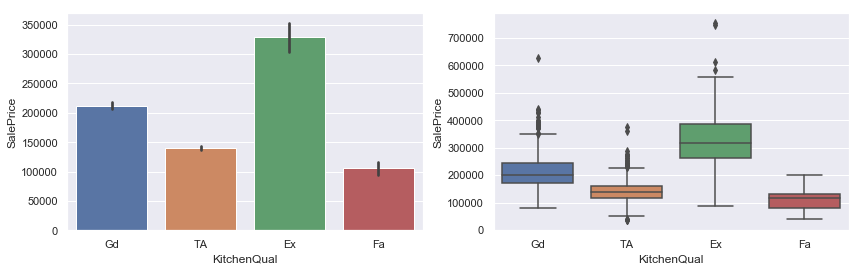

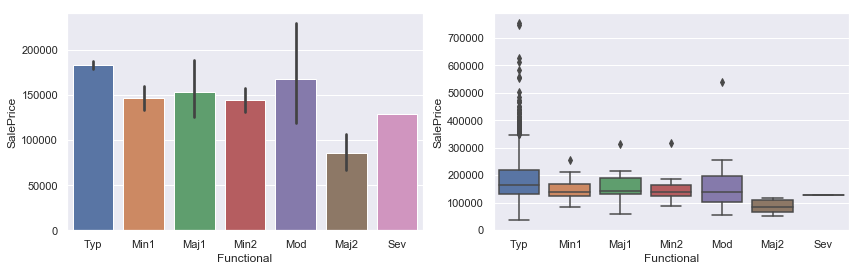

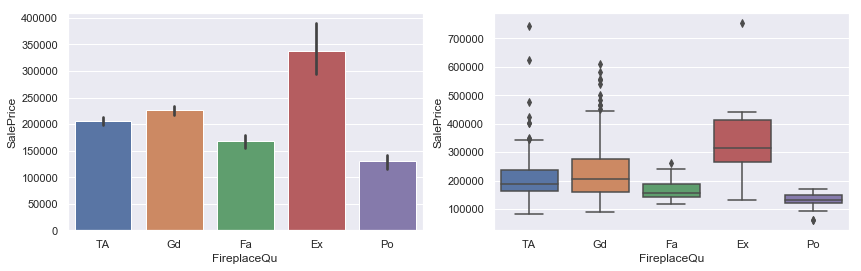

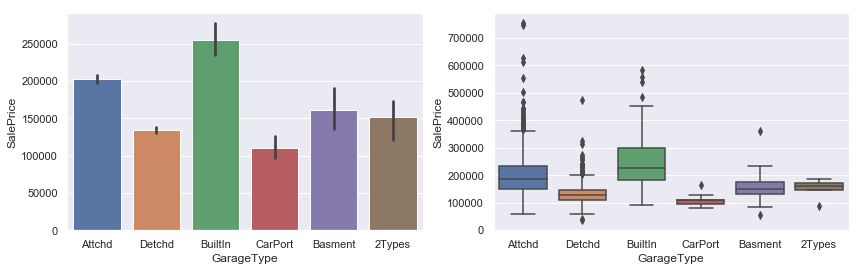

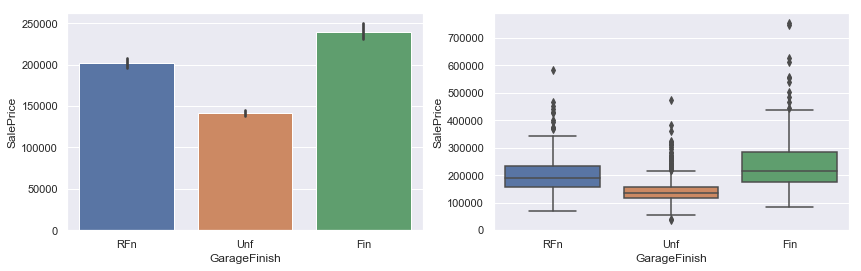

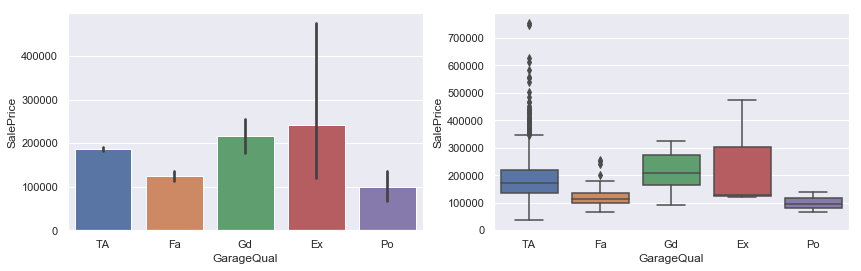

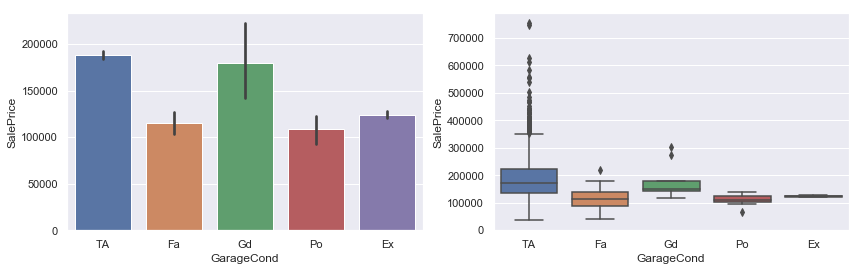

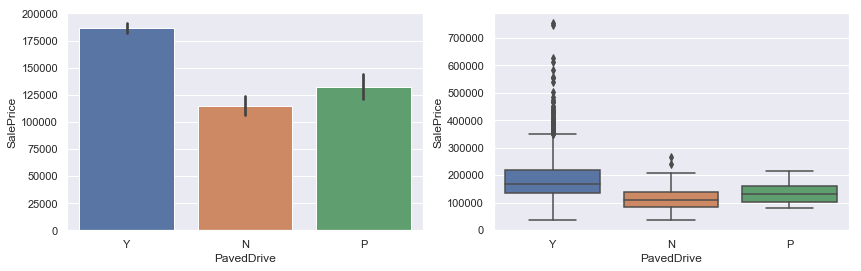

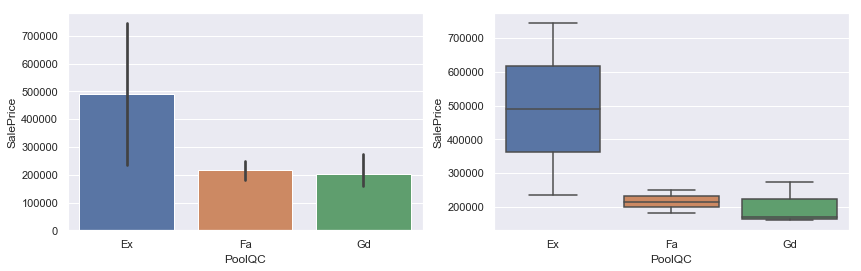

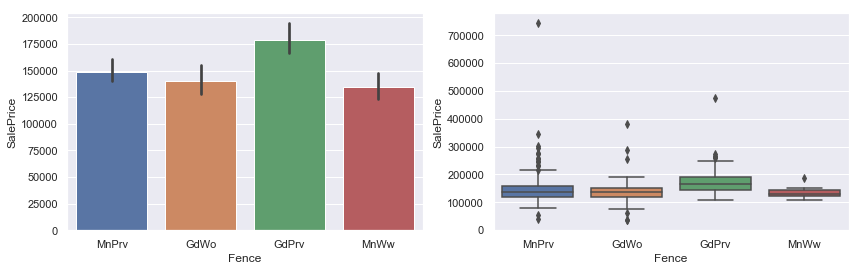

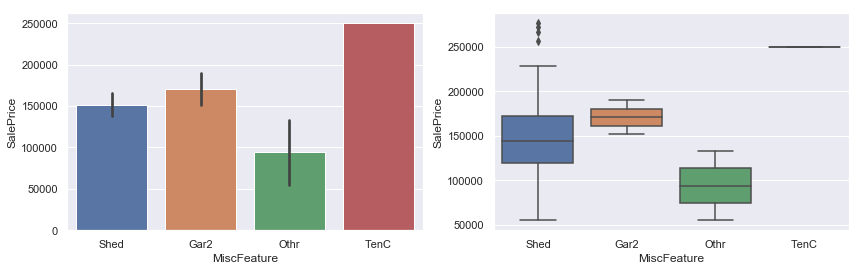

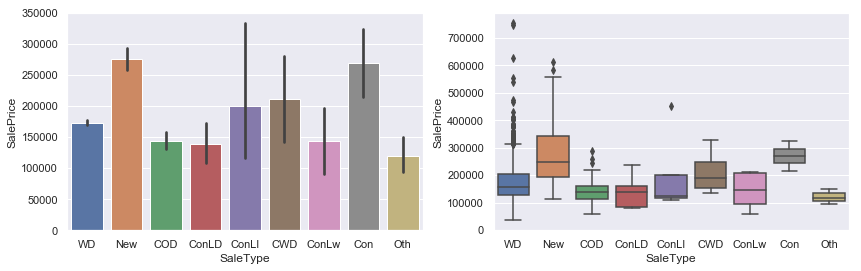

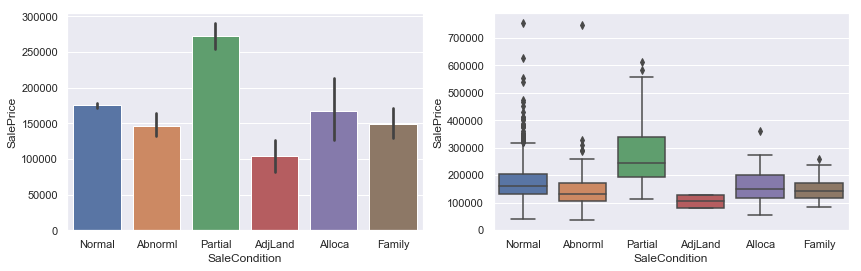

In [26]:
k = len(cat_columns)

for i in range(k) :
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
    sns.barplot(data=data, x=cat_columns[i], y='SalePrice', ax=ax1)
    sns.boxplot(data=data, x=cat_columns[i], y='SalePrice', ax=ax2)

In [27]:
cat_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

useful : ['MSZoning', 'Neighborhood', 'Condition1', 'Condition2', 'RoofMatl',  'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtCond', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType',
'GarageQual', 'PoolQC', 'MiscFeature', 'SaleType', 'SaleCondition']

useless : ['Utilities', 'LandSlope']

check : ['LotConfig', 'BsmtFinType2']

In [28]:
data['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [29]:
data['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [30]:
data['Condition2'].value_counts()

Norm      1445
Feedr        6
RRNn         2
PosN         2
Artery       2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [31]:
data['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
Metal         1
ClyTile       1
Membran       1
Name: RoofMatl, dtype: int64

In [32]:
data['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [33]:
data['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [34]:
data['HeatingQC'].value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

### target 확인

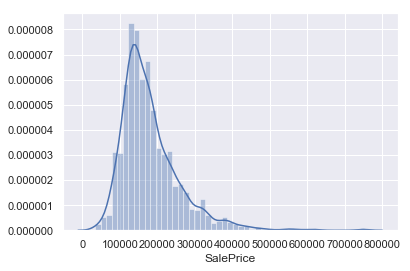

In [35]:
sns.distplot(data['SalePrice'])

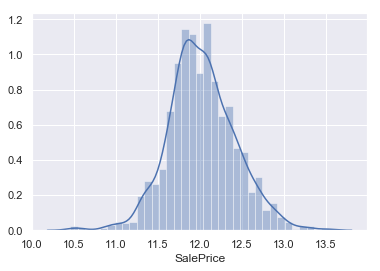

In [36]:
log_SalePrice = np.log1p(data['SalePrice'])
sns.distplot(log_SalePrice)

#### 수치형 data corr. 확인

In [37]:
corr_matrix = data.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

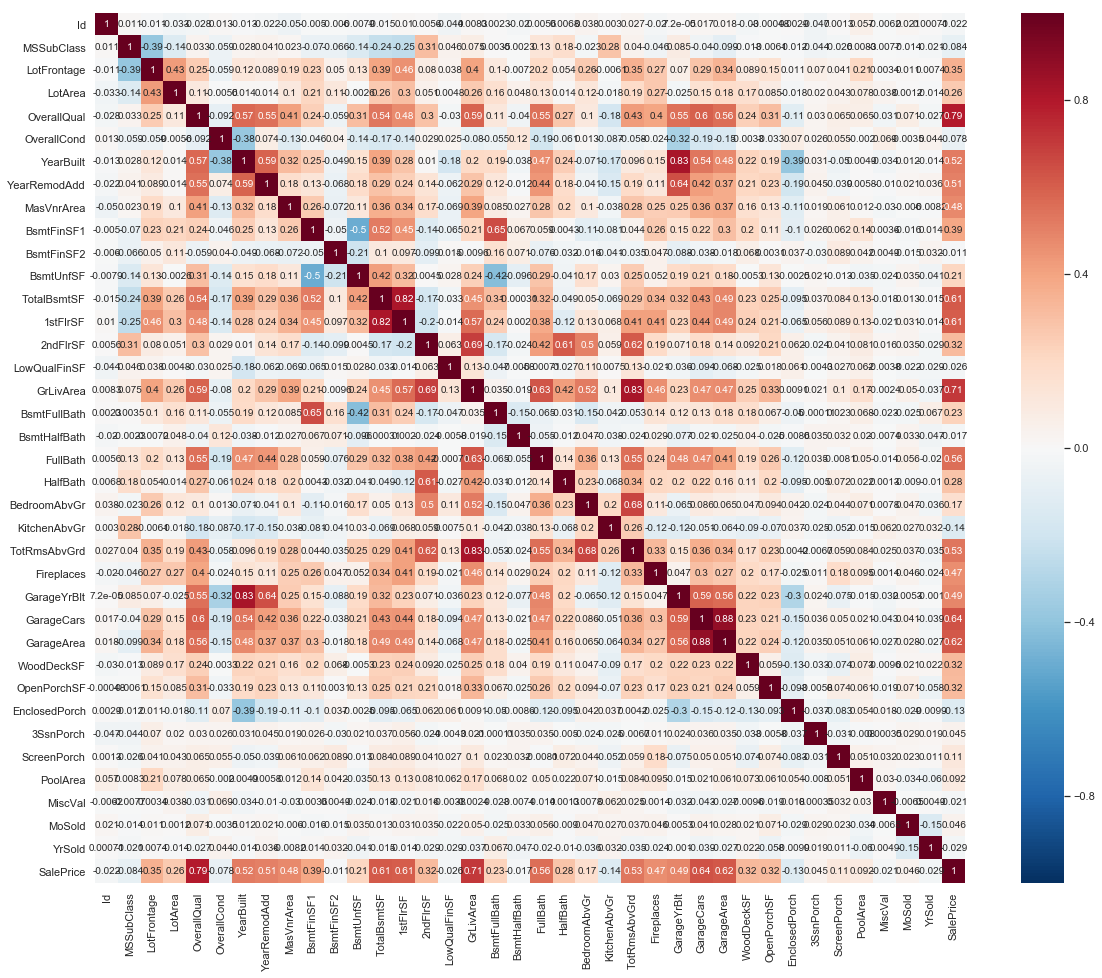

In [38]:
fig, ax1 = plt.subplots(nrows=1, ncols=1,figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', vmin=-1, vmax=1, square=True, cbar=True, ax=ax1)

In [39]:
original_corr = corr_matrix['SalePrice']

In [40]:
original_SalePrice = data['SalePrice']
data['SalePrice'] = np.log1p(data['SalePrice'])

In [41]:
corr_matrix = data.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

In [42]:
target_log_corr = corr_matrix['SalePrice']

In [43]:
data = train.copy()
data = data[num_columns]
data = np.log1p(data)

corr_matrix = data.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.802067
GrLivArea        0.730254
GarageCars       0.641561
1stFlrSF         0.608955
YearBuilt        0.584443
FullBath         0.580297
YearRemodAdd     0.565590
TotRmsAbvGrd     0.539998
GarageYrBlt      0.539622
Fireplaces       0.508925
OpenPorchSF      0.459948
GarageArea       0.454898
MasVnrArea       0.418659
LotArea          0.399923
TotalBsmtSF      0.372838
LotFrontage      0.364650
WoodDeckSF       0.343039
HalfBath         0.320925
BsmtFullBath     0.238945
BsmtUnfSF        0.208233
BsmtFinSF1       0.208099
BedroomAbvGr     0.197664
2ndFlrSF         0.180778
ScreenPorch      0.105857
PoolArea         0.069949
3SsnPorch        0.058827
MoSold           0.053096
OverallCond     -0.001794
BsmtHalfBath    -0.004890
Id              -0.014043
MSSubClass      -0.020279
BsmtFinSF2      -0.030361
YrSold          -0.037261
LowQualFinSF    -0.054513
MiscVal         -0.067054
KitchenAbvGr    -0.144278
EnclosedPorch   -0.207263
Name: SalePr

In [44]:
all_log_corr = corr_matrix['SalePrice']

In [45]:
data['SalePrice'] = original_SalePrice

corr_matrix = data.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.747192
GrLivArea        0.695147
1stFlrSF         0.591299
GarageCars       0.576617
FullBath         0.537412
TotRmsAbvGrd     0.522355
YearBuilt        0.520575
YearRemodAdd     0.506848
GarageYrBlt      0.484807
Fireplaces       0.480136
OpenPorchSF      0.429970
MasVnrArea       0.410944
LotArea          0.388528
GarageArea       0.371597
LotFrontage      0.349480
TotalBsmtSF      0.325883
WoodDeckSF       0.321450
HalfBath         0.291326
BsmtFullBath     0.230125
BsmtUnfSF        0.186572
BsmtFinSF1       0.185472
2ndFlrSF         0.167849
BedroomAbvGr     0.150791
ScreenPorch      0.093910
PoolArea         0.093700
3SsnPorch        0.047322
MoSold           0.036277
Id              -0.012949
BsmtHalfBath    -0.016531
YrSold          -0.028922
MSSubClass      -0.034217
LowQualFinSF    -0.044358
BsmtFinSF2      -0.048267
OverallCond     -0.053177
MiscVal         -0.063495
KitchenAbvGr    -0.132905
EnclosedPorch   -0.176065
Name: SalePr

In [46]:
data_log_corr = corr_matrix['SalePrice']

In [47]:
corr_matrix = pd.DataFrame({'original' : original_corr, 'target_log' : target_log_corr,
                             'all_log' : all_log_corr, 'data_log' : data_log_corr})

In [48]:
corr_matrix.sort_values(by='original', ascending=False)

,original,target_log,all_log,data_log
SalePrice,1.000000,1.000000,1.000000,1.000000
OverallQual,0.790982,0.817185,0.802067,0.747192
GrLivArea,0.708624,0.700927,0.730254,0.695147
GarageCars,0.640409,0.680625,0.641561,0.576617
GarageArea,0.623431,0.650888,0.454898,0.371597
TotalBsmtSF,0.613581,0.612134,0.372838,0.325883
1stFlrSF,0.605852,0.596981,0.608955,0.591299
FullBath,0.560664,0.594771,0.580297,0.537412
TotRmsAbvGrd,0.533723,0.534422,0.539998,0.522355
YearBuilt,0.522897,0.586570,0.584443,0.520575


#### 범주형 data corr. 확인

In [49]:
data = train.copy()
data = data[cat_columns]
data = pd.get_dummies(data)
data.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [50]:
data.shape

(1460, 252)

In [51]:
data['SalePrice'] = original_SalePrice
corr_matrix = data.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice                1.000000
BsmtQual_Ex              0.553105
KitchenQual_Ex           0.504094
Foundation_PConc         0.497734
ExterQual_Gd             0.452466
ExterQual_Ex             0.451164
BsmtFinType1_GLQ         0.434597
HeatingQC_Ex             0.434543
GarageFinish_Fin         0.419678
Neighborhood_NridgHt     0.402149
SaleType_New             0.357509
SaleCondition_Partial    0.352060
FireplaceQu_Gd           0.339329
GarageType_Attchd        0.335961
MasVnrType_Stone         0.330476
Neighborhood_NoRidge     0.330424
KitchenQual_Gd           0.321641
BsmtExposure_Gd          0.307298
Exterior2nd_VinylSd      0.306389
Exterior1st_VinylSd      0.305009
GarageCond_TA            0.275872
FireplaceQu_Ex           0.255239
CentralAir_Y             0.251328
GarageQual_TA            0.245346
MSZoning_RL              0.245063
HouseStyle_2Story        0.242880
Electrical_SBrkr         0.241896
RoofStyle_Hip            0.235897
GarageType_BuiltIn       0.235449
BsmtQual_Gd   